In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import tensorflow as tf


In [2]:
df = pd.read_excel("daily_offers.xlsx")
df1 = df.copy()

In [3]:
df1

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.1511,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.025,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.128,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.23559,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
df1.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [6]:
df1['country'].fillna( 78.0, inplace=True)
df1['application'].fillna(10.0 , inplace=True)

In [7]:
df1.country.mode()

0    78.0
dtype: float64

In [8]:
df1.drop('material_ref' , axis=1 , inplace=True)
df1.dropna(inplace=True)

In [9]:
df1.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
n = le.fit_transform(df1['status'])
print(n)

le = LabelEncoder()
m = le.fit_transform(df1['item type'])
print(m)

df1.drop(['status','item type'],axis=1 , inplace=True)
df1['status']=n
df1['item type']=m

[7 7 7 ... 7 7 7]
[5 5 6 ... 5 5 5]


In [11]:
df1['quantity tons'] = pd.to_numeric(df1['quantity tons'], errors='coerce')
df1['application'] = pd.to_numeric(df1['application'], errors='coerce')
df1['country'] = pd.to_numeric(df1['country'], errors='coerce')

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181664 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181664 non-null  object 
 1   item_date      181664 non-null  float64
 2   quantity tons  181663 non-null  float64
 3   customer       181664 non-null  float64
 4   country        181664 non-null  float64
 5   application    181664 non-null  float64
 6   thickness      181664 non-null  float64
 7   width          181664 non-null  float64
 8   product_ref    181664 non-null  int64  
 9   delivery date  181664 non-null  float64
 10  selling_price  181664 non-null  float64
 11  status         181664 non-null  int32  
 12  item type      181664 non-null  int32  
dtypes: float64(9), int32(2), int64(1), object(1)
memory usage: 18.0+ MB


In [13]:
df1.dropna(inplace=True)
    

In [14]:
corr = df1.corr()
corr

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price,status,item type
item_date,1.000000,-0.002095,-0.008821,-0.015959,-0.015875,0.003072,0.020469,0.037443,0.111251,0.004467,0.049104,0.055427
quantity tons,-0.002095,1.000000,-0.000031,-0.001531,-0.001955,-0.000640,-0.000428,-0.001086,-0.000652,-0.000010,-0.002912,-0.002439
customer,-0.008821,-0.000031,1.000000,0.015936,-0.010106,0.009588,0.009202,-0.007717,0.000955,-0.000053,-0.020450,-0.010901
country,-0.015959,-0.001531,0.015936,1.000000,-0.019504,-0.019427,0.055414,-0.147481,-0.015250,0.002991,0.090094,0.129741
application,-0.015875,-0.001955,-0.010106,-0.019504,1.000000,-0.059568,-0.204508,-0.131757,-0.013537,0.001462,0.132836,0.169138
thickness,0.003072,-0.000640,0.009588,-0.019427,-0.059568,1.000000,0.161711,0.038075,0.001634,-0.001130,-0.051950,-0.026086
width,0.020469,-0.000428,0.009202,0.055414,-0.204508,0.161711,1.000000,-0.034486,0.001707,0.000583,-0.093823,-0.092465
product_ref,0.037443,-0.001086,-0.007717,-0.147481,-0.131757,0.038075,-0.034486,1.000000,0.013398,0.002118,-0.069740,-0.089530
delivery date,0.111251,-0.000652,0.000955,-0.015250,-0.013537,0.001634,0.001707,0.013398,1.000000,0.000454,-0.003797,0.001899
selling_price,0.004467,-0.000010,-0.000053,0.002991,0.001462,-0.001130,0.000583,0.002118,0.000454,1.000000,-0.001319,-0.005073


<AxesSubplot:>

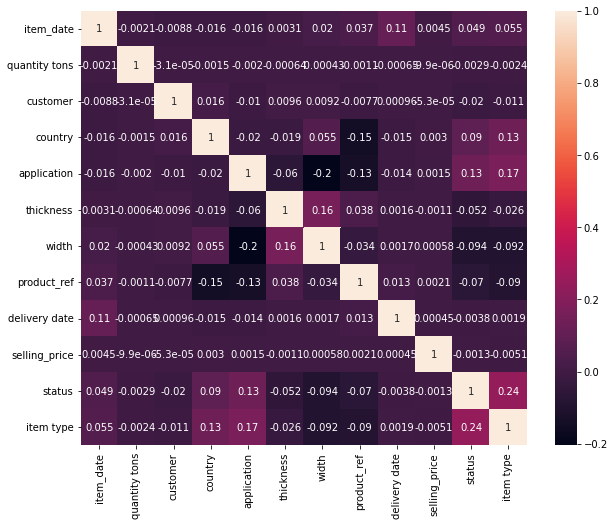

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(corr , annot=True)

In [16]:
df1

,id,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price,status,item type
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,7,5
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,7,5
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,28.0,0.38,952.0,628377,20210101.0,644.33,7,6
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,7,3
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,10.0,4.00,2000.0,640665,20210301.0,577.00,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,7,5
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,7,5
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,7,5
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000.000000,30200854.0,25.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,7,5


Text(0.5, 0, 'Item Type')

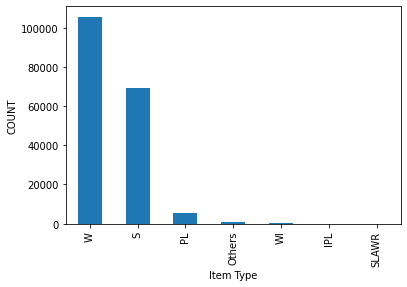

In [17]:
df['item type'].value_counts().plot(kind='bar')
plt.ylabel("COUNT")
plt.xlabel("Item Type")

Text(0.5, 0, 'Status')

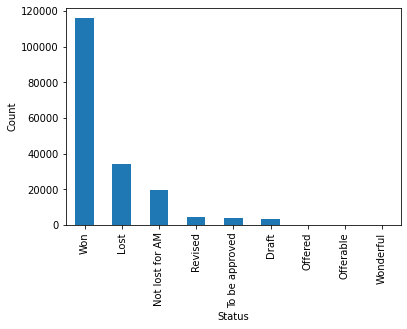

In [18]:
df['status'].value_counts().plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Status")

In [19]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [20]:
X = df1.drop(['id' , 'item_date', 'selling_price' , 'delivery date' , 'customer'], axis=1)
y = df1[['selling_price']]

In [21]:
X = scale.fit_transform(X)

### spliting the data into 90:10 ratio

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)


## Linear regression


In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [29]:
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
lr_predict = lr.predict(X_test)
r2_score(y_test, lr_predict)

-21.48120139307512

In [26]:
from sklearn import metrics
metrics.mean_squared_error(y_test , lr_predict)

9164893.12673797

### Random Forest Regressor

In [27]:
rf = RandomForestRegressor(n_estimators=120 , random_state = 42)
rf.fit(X_train ,y_train)
predict = rf.predict(X_test)

C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [28]:
lr_predict = lr.predict(X_test)
r2_score(y_test, predict)

-45737.40644376256

In [29]:
from sklearn import metrics
metrics.mean_squared_error(y_test , predict)

18646139034.789726

### Hypertuning the Random Forest Regressor

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [5 , 8, 10 ,12 ,15],# ,80, 90, 100, 110
    "max_features" : ['sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500 ,1000]
}
rf1 = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf1, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [31]:
grid_search.fit(X_train ,y_train)
grid_predictions = grid_search.predict(X_test) 

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [32]:
r2_score(y_test,grid_predictions)

-5062.849591466097

### Support Vector Regressor

In [33]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train , y_train)
svr_predict = svr.predict(X_test)

C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [34]:
lr_predict = lr.predict(X_test)
r2_score(y_test, svr_predict)

0.01929103063134696

### Deep learning Regression

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048 , activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024 , activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1 , activation='sigmoid')
    
])

In [24]:
model.compile(loss =tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              optimizer ='RMSprop',
              metrics = ['accuracy'])

In [25]:
model_fit= model.fit( X_train , y_train ,epochs=200,validation_data=(X_test , y_test), verbose=2 ,batch_size =10000)

Epoch 1/200
17/17 - 9s - loss: 1.4111 - accuracy: 1.2233e-05 - val_loss: 1.4499 - val_accuracy: 0.0000e+00
Epoch 2/200
17/17 - 7s - loss: 1.4677 - accuracy: 1.2233e-05 - val_loss: 1.4826 - val_accuracy: 0.0000e+00
Epoch 3/200
17/17 - 7s - loss: 1.4970 - accuracy: 1.2233e-05 - val_loss: 1.5117 - val_accuracy: 0.0000e+00
Epoch 4/200
17/17 - 7s - loss: 1.5220 - accuracy: 1.2233e-05 - val_loss: 1.5405 - val_accuracy: 0.0000e+00
Epoch 5/200
17/17 - 7s - loss: 1.5525 - accuracy: 1.2233e-05 - val_loss: 1.5680 - val_accuracy: 0.0000e+00
Epoch 6/200
17/17 - 7s - loss: 1.5804 - accuracy: 1.2233e-05 - val_loss: 1.5978 - val_accuracy: 0.0000e+00
Epoch 7/200
17/17 - 7s - loss: 1.6176 - accuracy: 1.2233e-05 - val_loss: 1.6262 - val_accuracy: 0.0000e+00
Epoch 8/200
17/17 - 7s - loss: 1.6416 - accuracy: 1.2233e-05 - val_loss: 1.6598 - val_accuracy: 0.0000e+00
Epoch 9/200
17/17 - 7s - loss: 1.6732 - accuracy: 1.2233e-05 - val_loss: 1.6961 - val_accuracy: 0.0000e+00
Epoch 10/200
17/17 - 7s - loss: 1.713